Arithm. Mean : 0.9479667209378617
Computed Mean: 0.9478947894789479
Fisher Error  : 0.03770138956888121
Computed Error: 0.06324555320071375


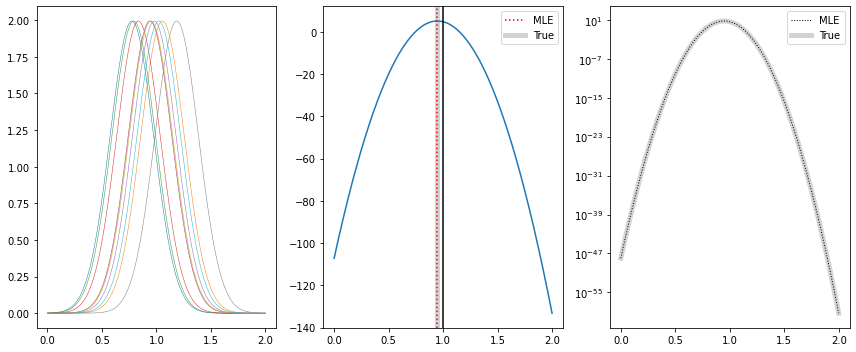

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm

mu = 1; sigma = 0.2
N = 10
Sample = norm(mu, sigma).rvs(N)

x = np.linspace(0, 2, 10000)
fig, axs = plt.subplots(1, 3, figsize=(12, 5), tight_layout=True)
for xi in Sample[:10]:
    axs[0].plot(x, norm(xi, sigma).pdf(x), lw=0.5)

logL = np.sum( [ np.log(norm(xi, sigma).pdf(x)) for xi in Sample], axis=0 )
axs[1].plot(x, logL)

iMax = int ( np.argwhere( logL == np.max(logL) ) )
max = x[iMax]

axs[1].axvline( max, c='red', label='MLE', ls=':')
axs[1].axvline( np.mean(Sample), label='True', ls='-', lw=5, zorder=-1, c='lightgray')
axs[1].axvline(1, c='k')
axs[1].legend()
print('Arithm. Mean :', np.mean(Sample))
print('Computed Mean:', max)

#logL = np.sum( [np.log( norm(xi, sigma).pdf(x) ) for xi in Sample], axis=0 )
dx = np.diff(x)[0]

dlogL = np.diff(logL)
#dlogL = np.append(dlogL, logL[-1])
dlogL = dlogL/dx
d2logL = np.diff(dlogL)
#d2logL = np.append(d2logL, d2logL[-1])
d2logL = d2logL/dx

a = 1/np.sqrt(-d2logL)
axs[2].plot(x, norm(max, a[iMax]).pdf(x), c='k', ls=':', lw=1, label='MLE')
axs[2].plot(x, norm(np.mean(Sample), 0.2/np.sqrt(N)).pdf(x), c='lightgray', ls='-', lw=5, zorder=-1, label='True')
axs[2].set_yscale('log')
axs[2].legend()

print('Fisher Error  :', np.sqrt(np.var(Sample))/np.sqrt(N))
print('Computed Error:', a[iMax])

Weighted Mean: 0.9941080053313482
Computed Mean: 0.9576957695769577
Fisher Error  : 0.0903206984734193
Computed Error: 0.0974343457396534


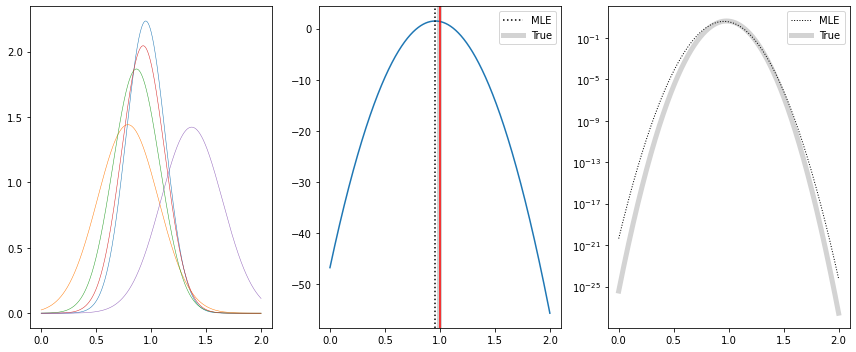

In [8]:
mu = 1; sigma = 0.2
N = 5
Sample = norm(mu, sigma).rvs(N)
Sigmas = norm(sigma, 0.05).rvs(N)

x = np.linspace(0, 2, 10000)
fig, axs = plt.subplots(1, 3, figsize=(12, 5), tight_layout=True)
for xi, si in zip( Sample[:10], Sigmas[:10] ):
    axs[0].plot(x, norm(xi, si).pdf(x), lw=0.5)

logL = np.sum( [np.log( norm(xi, si).pdf(x) ) for xi, si in zip(Sample, Sigmas)], axis=0 )
axs[1].plot(x, logL)

iMax = int ( np.argwhere( logL == np.max(logL) ) )
max = x[iMax]

axs[1].axvline( max, c='k', label='MLE', ls=':')
axs[1].axvline( np.average(Sample, weights=Sigmas), label='True', ls='-', lw=5, zorder=-1, c='lightgray')
axs[1].axvline(1, c='red')
axs[1].legend()
print('Weighted Mean:', np.average(Sample, weights=Sigmas))
print('Computed Mean:', max)


dx = np.diff(x)[0]
dlogL = np.diff(logL)
#dlogL = np.append(dlogL, logL[-1])
dlogL = dlogL/dx
d2logL = np.diff(dlogL)
#d2logL = np.append(d2logL, d2logL[-1])
d2logL = d2logL/dx

a = 1/np.sqrt(-d2logL)
axs[2].plot(x, norm(max, a[iMax]).pdf(x), c='k', ls=':', lw=1, label='MLE')
axs[2].plot(x, norm(np.mean(Sample), 0.2/np.sqrt(N)).pdf(x), c='lightgray', ls='-', lw=5, zorder=-1, label='True')
axs[2].set_yscale('log')
axs[2].legend()
print('Fisher Error  :', np.sqrt(np.var(Sample))/np.sqrt(N))
print('Computed Error:', a[iMax])